# División del DataSet

En este Notebook se muestran algunos mecanismos  más utilizados para la división del DataSet.

### Descripcion 
NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in [1]. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods.

Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

### Ficheros de Datos
* <span style="color:green">*KDDTrain+.ARFF*: The full NSL-KDD train set with binary labels in ARFF format.</span>
* KDDTrain+.TXT*: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format.
* KDDTrain+_20Percent.ARFF: A 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT: A 20% subset of the KDDTrain+.txt file.
* KDDTest+.ARFF: The full NSL-KDD test set with binary labels in ARFF format.
* KDDTest+.TXT: The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
* KDDTest-21.ARFF: A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21.
* KDDTest-21.TXT: A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21.

### Descarga de los ficheros:
https://www.unb.ca/cic/datasets/nsl.html
    
### Referencias Adicionales
M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009.

## 1.-Lectura del DataSet

In [1]:
import arff
import pandas as pd

In [2]:
def load_kdd_dataset(data_path):
    """Lectura del conjunto de datos NSL-KDD."""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
    attributes = [attr[0] for attr in dataset["attributes"]]
    return pd.DataFrame(dataset["data"], columns = attributes)

In [3]:
df = load_kdd_dataset("datasets/NSL-KDD/KDDTrain+.arff")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

## 2.-División del DataSet.

Se debe separar el DataSet en los diferentes subconjuntos necesarios para realizar los procesos de entrenamiento,validacion y pruebas. Sklearn tiene implementada la función **train_test_split.**

In [5]:
# Separar el DataSet 60% train set, 40% test set.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell 

In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50390 entries, 378 to 89600
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50390 non-null  float64
 1   protocol_type                50390 non-null  object 
 2   service                      50390 non-null  object 
 3   flag                         50390 non-null  object 
 4   src_bytes                    50390 non-null  float64
 5   dst_bytes                    50390 non-null  float64
 6   land                         50390 non-null  object 
 7   wrong_fragment               50390 non-null  float64
 8   urgent                       50390 non-null  float64
 9   hot                          50390 non-null  float64
 10  num_failed_logins            50390 non-null  float64
 11  logged_in                    50390 non-null  object 
 12  num_compromised              50390 non-null  float64
 13  root_shell    

In [8]:
# Separar el conjunto de datos de pruebas 50% validation set, 50% test_set.
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [9]:
print ("Longitud del Trainig Set: ", len(train_set))
print ("Longitud del Validation Set: ", len(val_set))
print ("Longitud del Test Set: ", len(test_set))

Longitud del Trainig Set:  75583
Longitud del Validation Set:  25195
Longitud del Test Set:  25195


## 3.-Particionado aleatorio y Stratified Sampling.

Sklearn tiene implementada la función **train_test_split**, sin embargo, esta función por defecto realiza un particionado del DataSet aleatorio para cada vez que se ejecuta el script. Aun añadiendo una semilla fija para generación aleatoria, cada vez que se cargue de nuevo el DataSet se generarán nuevos subconjuntos. Esto puede ocaionar que después de muchos intentos, el algoritmo "vea" todo el DataSet.

Para solucionar este stopper, Sklearn ha introducido el parámetro, **suffle** en la función **tain_test_split**.

In [10]:
# Si shuffle=false, el DataSet no mezclará antes del particionado.
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, shuffle=False)

Estos métodos  para dividir el DataSet estan bien, si se tiene un conjunto de datos muy grande, pero si no se tiene, se corre el riesgo de introducir **Sampling Bias**.

Para evitar esto, se utiliza un método que se llama **Stratified Sampling**. La población es dividida en subconjuntos homogeneos llamados **strata**. El objetivo es que no quede ninguna característica del DataSet sin representación en ninguno de los conjuntos de Datos para una o mas caracteristícas en particular.

Sklearn introduce el parametro **statify** en la función **train_test_split** para controlar este comportamiento.

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

https://stackoverflow.com/a/38889389

In [11]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, stratify=df["protocol_type"])

## 4.-Generación de una Funcion de Particionado.


In [12]:
# Construcción de una función de particionado que realice el particionado completo.
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
    df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
    test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return(train_set, val_set, test_set)

In [13]:
print("Longitud del conjunto del DataSet: ", len(df))

Longitud del conjunto del DataSet:  125973


In [14]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type')

In [15]:
print ("Longitud del Trainig Set: ", len(train_set))
print ("Longitud del Validation Set: ", len(val_set))
print ("Longitud del Test Set: ", len(test_set))

Longitud del Trainig Set:  75583
Longitud del Validation Set:  25195
Longitud del Test Set:  25195


<AxesSubplot:>

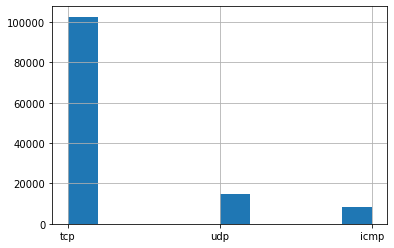

In [16]:
# Comprobar que stratify mantiene la proporcion de la característica en 
# los subconjuntos.
%matplotlib inline
import matplotlib.pyplot as plt
df["protocol_type"].hist()

<AxesSubplot:>

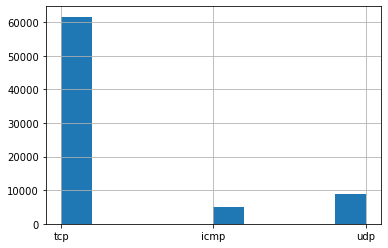

In [17]:
train_set["protocol_type"].hist()

<AxesSubplot:>

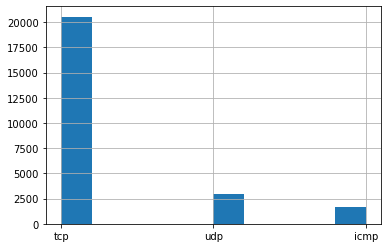

In [18]:
val_set["protocol_type"].hist()

<AxesSubplot:>

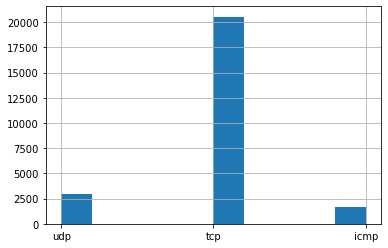

In [19]:
test_set["protocol_type"].hist()